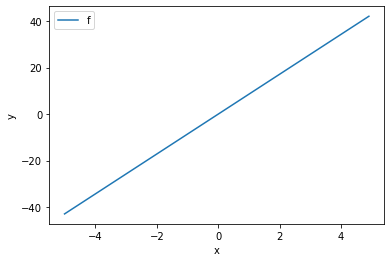

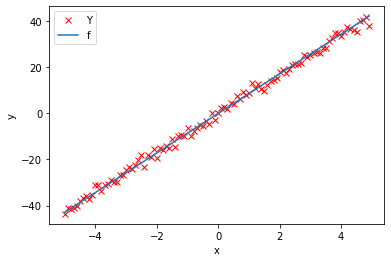

tensor(-10.)


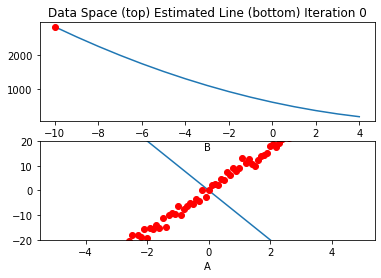

<Figure size 432x288 with 0 Axes>

tensor(20.8226)


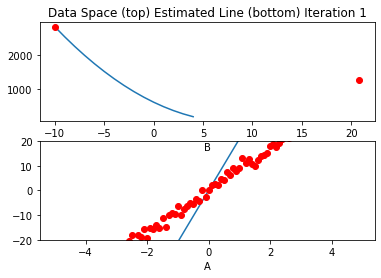

<Figure size 432x288 with 0 Axes>

tensor(0.2639)


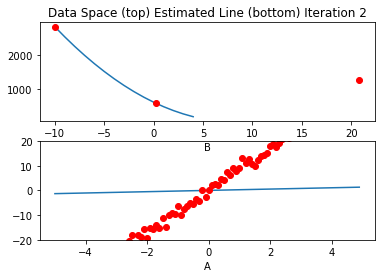

<Figure size 432x288 with 0 Axes>

tensor(13.9766)


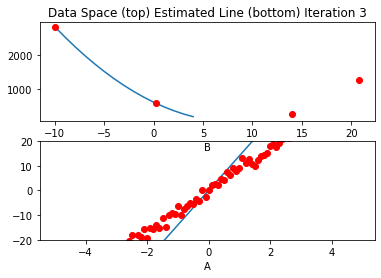

<Figure size 432x288 with 0 Axes>

tensor(4.8302)


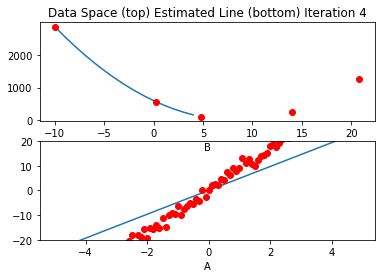

<Figure size 432x288 with 0 Axes>

tensor(10.9308)


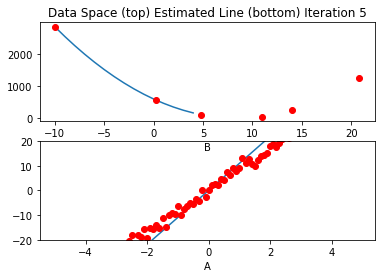

<Figure size 432x288 with 0 Axes>

tensor(6.8617)


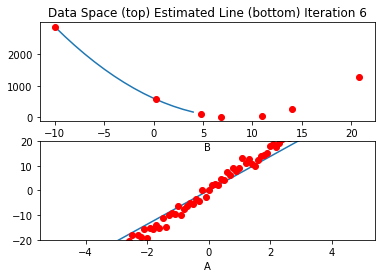

<Figure size 432x288 with 0 Axes>

tensor(9.5758)


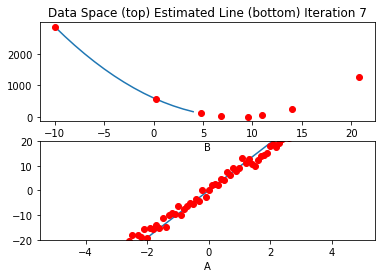

<Figure size 432x288 with 0 Axes>

Text(17.5, 0.5, 'Cost')

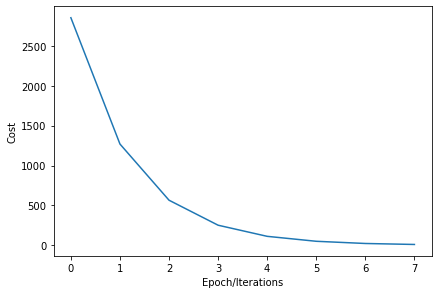

In [37]:
import torch
import matplotlib.pyplot as plt
import numpy as np


class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X,w.data), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        print(w.data)
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
        plt.show()
    
    # Destructor
    def __del__(self):
        plt.close('all')
        
        
#creating data
X = torch.arange(-5.0,5.0,0.1).view(-1,1)
f = 8.6 * X

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Y = f + 1.5 * torch.randn(X.size())

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

w = torch.tensor(-10.0,requires_grad=True)

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

def forward(x,W):
    return W * x


lr=0.1

def my_model(epoch, loss_big, W):
    gradient_plot = plot_diagram(X, Y, W, stop = 5)
    for i in range(epoch):
        yhat = forward(X,W)
        loss = criterion(yhat,Y)
        gradient_plot(yhat,W,loss.item(),i)
        loss_big.append(loss)
        loss.backward()
        W.data = W.data - lr * W.grad.data 
        W.grad.data.zero_()
        

LOSS1=[]  
my_model(8,LOSS1,w)

#w2 = torch.tensor(5.0,requires_grad=True)
#LOSS2=[]
#my_model(8, LOSS2, w2)


plt.plot(LOSS1, label='w= -10')
#plt.plot(LOSS2, label='w= 5.0')
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")